In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('pumps.csv',\
                 index_col=0)
df

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [298]:
df2 = pd.read_csv('pumps_y.csv',\
                 index_col=0)

In [315]:
df3 = df2.join(df)

In [316]:
print(df3.shape)

(59400, 40)


In [319]:
df3

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,0.0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,functional,0.0,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0.0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,functional,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0.0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,non functional,0.0,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0.0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,functional,0.0,2011-07-13,Action In A,0.0,Artisan,31.130847,-1.825359,Shuleni,0.0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,functional,10.0,2013-05-03,Germany Republi,1210.0,CES,37.169807,-3.253847,Area Three Namba 27,0.0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
27263,functional,4700.0,2011-05-07,Cefa-njombe,1212.0,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0.0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
37057,functional,0.0,2011-04-11,NaN,0.0,NaN,34.017087,-8.750434,Mashine,0.0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [320]:
print(df2.shape)

(59400, 1)


In [305]:
df3 = df[df.longitude >20]

In [306]:
df3

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


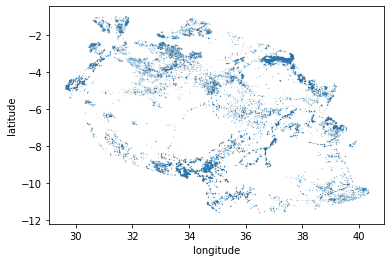

In [307]:
#df = df[df.longitude != 0]

df3.plot.scatter('longitude', 'latitude', s=0.001)
#pyl.axis(ymin=-12, ymax=-0.1, xmin=25, xmax=45)

In [308]:
X=df3[['longitude','latitude']].to_numpy()

In [309]:
X

array([[34.93809275, -9.85632177],
       [34.6987661 , -2.14746569],
       [37.46066446, -3.82132853],
       ...,
       [34.01708706, -8.75043433],
       [35.86131531, -6.37857327],
       [38.10404822, -6.74746425]])

In [310]:
df2

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
...,...
60739,functional
27263,functional
37057,functional


In [311]:
X.shape

(57588, 2)

In [313]:
y=df2[['status_group']].to_numpy()

In [268]:
y

array([['functional'],
       ['functional'],
       ['functional'],
       ...,
       ['functional'],
       ['functional'],
       ['functional']], dtype=object)

In [269]:
y,labels = pd.factorize(y[:,0])

In [270]:
y,labels

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array(['functional', 'non functional', 'functional needs repair'],
       dtype=object))

In [271]:
m = LogisticRegression(C=1e5) #Hyperparameter (regularization, W03. ignore now)
m.fit(X, y)

C:\Users\casti\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\casti\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [272]:
print(m.score(X, y))

0.543080808080808


In [273]:
m.coef_

array([[ 0.010231  ,  0.01002816],
       [ 0.00996111, -0.01048875],
       [-0.04261124,  0.00487217]])

In [274]:
m.intercept_

array([-0.11857319, -0.87179933, -1.11041394])

In [275]:
point = [[0.5, 3.0]]
m.predict(point)
m.predict_proba(point).round(3)

array([[0.472, 0.285, 0.243]])

In [276]:
from matplotlib import pyplot as plt
%matplotlib inline

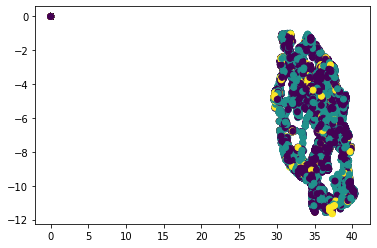

In [277]:
plt.scatter(X[:,0], X[:,1], c=y)
#plt.scatter(X[:,0], X[:,1], c=y)

In [278]:
df.reshape(-1, 1)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [101]:
m = LogisticRegression(C=1e5) #Hyperparameter (regularization, W03. ignore now)
m.fit('longitude', 'latitude') # find the best parameters for this data

C:\Users\casti\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'longitude'

In [12]:
print(df2.shape)

(59400, 1)


In [13]:
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [14]:
df2.columns

Index(['status_group'], dtype='object')

In [15]:
idlist = [x for x in df.columns]

In [16]:
df.set_axis(axis=1, labels=idlist, inplace=True)

In [17]:
idlist2 = [x for x in df2.columns]

In [18]:
df2.set_axis(axis=1, labels=idlist2, inplace=True)

In [19]:
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [20]:
sdf = df.stack()
sdf2 = df2.stack()

In [21]:
sdf

id                          
69572  amount_tsh                       6000
       date_recorded              2011-03-14
       funder                          Roman
       gps_height                       1390
       installer                       Roman
                                    ...     
26348  source                   shallow well
       source_type              shallow well
       source_class              groundwater
       waterpoint_type             hand pump
       waterpoint_type_group       hand pump
Length: 2270506, dtype: object

In [22]:
sdf2

id                 
69572  status_group        functional
8776   status_group        functional
34310  status_group        functional
67743  status_group    non functional
19728  status_group        functional
                            ...      
60739  status_group        functional
27263  status_group        functional
37057  status_group        functional
31282  status_group        functional
26348  status_group        functional
Length: 59400, dtype: object

In [30]:
d3 = {'id': sdf, 'status_group': sdf2}
df3 = pd.DataFrame(data=d3)

In [31]:
df3

id status_group
id                                                          
0     amount_tsh                              0          NaN
      basin                     Lake Tanganyika          NaN
      construction_year                       0          NaN
      date_recorded                  2012-11-13          NaN
      district_code                           3          NaN
...                                         ...          ...
74247 ward                             Maposeni          NaN
      water_quality                        soft          NaN
      waterpoint_type        communal standpipe          NaN
      waterpoint_type_group  communal standpipe          NaN
      wpt_name                      Kwa Mapunda          NaN

[2329906 rows x 2 columns]

In [32]:
df4=df3.stack()

In [33]:
df4

id                              
0      amount_tsh             id                     0
       basin                  id       Lake Tanganyika
       construction_year      id                     0
       date_recorded          id            2012-11-13
       district_code          id                     3
                                           ...        
74247  ward                   id              Maposeni
       water_quality          id                  soft
       waterpoint_type        id    communal standpipe
       waterpoint_type_group  id    communal standpipe
       wpt_name               id           Kwa Mapunda
Length: 2329906, dtype: object

In [34]:
df5 = df4.unstack(0,2)

In [35]:
df5

,id,0,1,2,3,4,5,6,7,8,9,...,74235,74236,74237,74238,74239,74240,74242,74243,74246,74247
amount_tsh,id,0,0,0,10,0,50,0,0,0,0,...,500,0,0,40,1000,0,0,0,50,50
basin,id,Lake Tanganyika,Rufiji,Wami / Ruvu,Pangani,Wami / Ruvu,Wami / Ruvu,Internal,Rufiji,Wami / Ruvu,Lake Victoria,...,Lake Nyasa,Wami / Ruvu,Lake Nyasa,Pangani,Rufiji,Pangani,Rufiji,Lake Victoria,Rufiji,Ruvuma / Southern Coast
construction_year,id,0,2008,0,1999,0,0,0,0,0,0,...,2000,0,0,0,1974,2012,0,1983,2000,2009
date_recorded,id,2012-11-13,2011-03-05,2011-03-27,2013-06-03,2011-03-22,2011-02-26,2012-10-20,2011-03-23,2011-04-07,2011-07-12,...,2013-03-27,2011-03-21,2011-07-30,2011-03-20,2011-03-18,2013-03-22,2011-04-12,2012-11-13,2011-03-07,2013-02-16
district_code,id,3,4,4,5,4,43,3,1,5,8,...,3,3,3,6,3,7,2,6,1,2
extraction_type,id,afridev,other - rope pump,mono,gravity,nira/tanira,submersible,other,other,mono,mono,...,gravity,mono,gravity,submersible,gravity,gravity,gravity,submersible,gravity,other
extraction_type_class,id,handpump,rope pump,motorpump,gravity,handpump,submersible,other,other,motorpump,motorpump,...,gravity,motorpump,gravity,submersible,gravity,gravity,gravity,submersible,gravity,other
extraction_type_group,id,afridev,rope pump,mono,gravity,nira/tanira,submersible,other,other,mono,mono,...,gravity,mono,gravity,submersible,gravity,gravity,gravity,submersible,gravity,other
funder,id,Tasaf,Shipo,Lvia,Germany Republi,Cmsr,Private,Government Of Tanzania,Water,Water,Ded,...,Bruder,Water,Kkkt_makwale,District Council,Government Of Tanzania,World Vision,Danida,Ministry Of Water,Ruthe,Mission
gps_height,id,0,1978,0,1639,0,28,0,0,0,0,...,1273,0,0,321,2140,1183,0,1188,1428,965


In [36]:
import pylab as pyl

In [37]:
df6 = df4.unstack(2)


ValueError: scatter requires x column to be numeric